# Decision Trees
Predict Class/Category based on IV;
Similar to Logistic Regression but different technique
Decision Tree - one of the most popular ML algo
Obsvervation to conclusion(category); 
Observations are represented as branches, conclusions as leaves
-- Classification tree - target variable discrete value
-- Regression tree - target is continuous value


## Steps
Attributes are assumed to be categorical for information gain and gini index
Statistical methods are used for ordering attributes as root or internal node
-- Find the best attribute and place it on the root node of the tree
-- Split the training set of the dataset into subsets
-- Find leaf nodes in all branches by repeating previous steps in each subset

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

### Decision Tree Libraries

In [2]:
from sklearn import tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Create Model

In [3]:
X = [[0,1], [1,0]] #is it raining=(No-0, Yes-1) ; humidity=(No=1, Yes=1)
Y = [1,0]  #class labels -  0- play no, 1- play yes
print(X, Y)

[[0, 1], [1, 0]] [1, 0]


In [4]:
np.array(X)  # display array form

array([[0, 1],
       [1, 0]])

In [5]:
np.concatenate((np.array(X), np.array(Y).reshape(-1,1)), axis=1)  # another way to display
#if X=0(not raining), Y=1(Play)

array([[0, 1, 1],
       [1, 0, 0]])

## Model

In [6]:
dtModel = tree.DecisionTreeClassifier()  #blank model
dtModel.fit(X,Y)  #fit - Build a decision tree classifier from the training set (X, y)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

DecisionTreeClassifier()

## Visualise

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

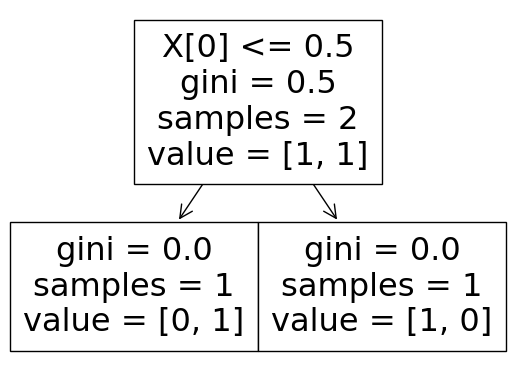

In [7]:
#visualise
tree.plot_tree(decision_tree= dtModel)

[Text(0.5, 0.75, 'Rain <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Dont Play'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Play'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Dont Play')]

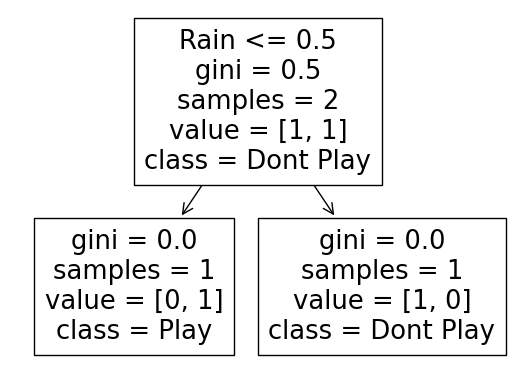

In [8]:
# Visualise - with proper category names
features=['Rain','Humidity']
tree.plot_tree(decision_tree= dtModel, feature_names =features, class_names= ['Dont Play','Play'])  #1-Play, 0=dontplay

In [9]:
## Predict Category
dtModel.predict([[0,1]]) #if X=[0,1], Y=1 : Rain=No, Humidity=Yes

array([1])

In [10]:
dtModel.predict([[1,1]]) #if X=[1,1], Y=0 : Rain=Yes, Humidity=Yes

array([0])

## Graph 

In [11]:
# External File
features=['Rain','Humidity']
tree.export_graphviz(dtModel, feature_names= features, filled=True, rounded=True, impurity=False, class_names=['Play','No Play'])

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Rain <= 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = Play", fillcolor="#ffffff"] ;\n1 [label="samples = 1\\nvalue = [0, 1]\\nclass = No Play", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="samples = 1\\nvalue = [1, 0]\\nclass = Play", fillcolor="#e58139"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [12]:
# External File
dotfile = open('dtree1.dot','w')
features=['Rain','Humidity']
tree.export_graphviz(dtModel, out_file = dotfile, feature_names= features, filled=True, rounded=True, impurity=False, class_names=['Play','No Play'])
dotfile.close()

### See the graph with code
#paste the code here : http://www.webgraphviz.com/
#this will create tree 

In [13]:
# Accuracy, Confusion Matrix

### now practise in actual dataset
https://www.kdnuggets.com/2021/03/beautiful-decision-tree-visualizations-dtreeviz.html

In [15]:
iris = data('iris')
print(iris.columns, iris.shape)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object') (150, 5)


In [17]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
y = iris['Species']
print(pd.concat([X, y], axis=1))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
1             5.1          3.5           1.4          0.2      setosa
2             4.9          3.0           1.4          0.2      setosa
3             4.7          3.2           1.3          0.2      setosa
4             4.6          3.1           1.5          0.2      setosa
5             5.0          3.6           1.4          0.2      setosa
6             5.4          3.9           1.7          0.4      setosa
7             4.6          3.4           1.4          0.3      setosa
8             5.0          3.4           1.5          0.2      setosa
9             4.4          2.9           1.4          0.2      setosa
10            4.9          3.1           1.5          0.1      setosa
11            5.4          3.7           1.5          0.2      setosa
12            4.8          3.4           1.6          0.2      setosa
13            4.8          3.0           1.4          0.1      setosa
14            4.3   

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# fit the classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

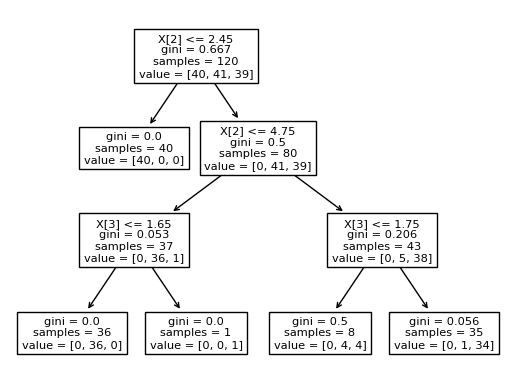

In [20]:
tree.plot_tree(clf);

In [32]:
print(X.columns)
print(y.value_counts(normalize=True))
#print(y.str.get_dummies())

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: Species, dtype: float64


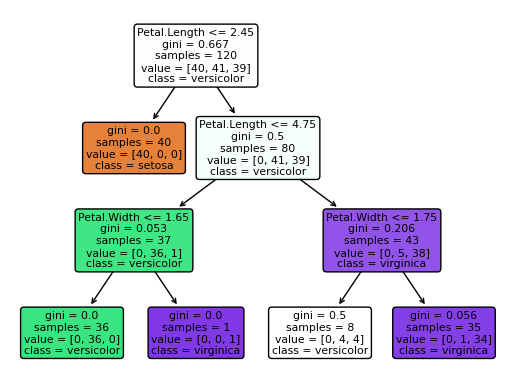

In [30]:
tree.plot_tree(clf, feature_names = X.columns, 
               class_names=['setosa','versicolor','virginica'], rounded=True,   filled = True);

In [46]:
#!pip install dtreeviz
from dtreeviz.trees import *

In [48]:
#new way
viz = dtreeviz(clf,  x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=X.columns, 
               class_names=['setosa','versicolor','virginica'], 
               title="Decision Tree - Iris data set")
viz

TypeError: dtreeviz() got an unexpected keyword argument 'x_data'